(3663, 1530)
Index(['Source', 'SubSource', 'SubID', 'NetID', 'SLN', 'smi', 'LogS', 'No_',
       'NAME', 'MW',
       ...
       'DLS_01', 'DLS_02', 'DLS_03', 'DLS_04', 'DLS_05', 'DLS_06', 'DLS_07',
       'DLS_cons', 'LLS_01', 'LLS_02'],
      dtype='object', length=1530)
(3663, 1522)
(3663,)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


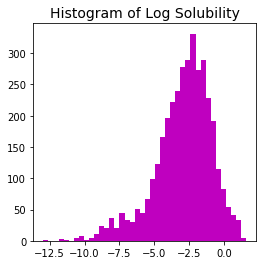

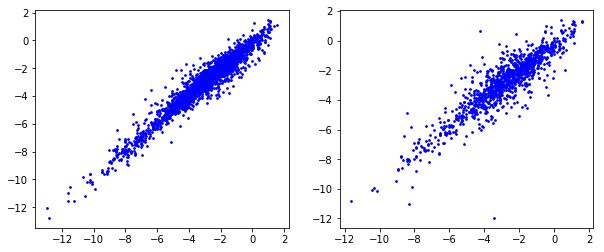

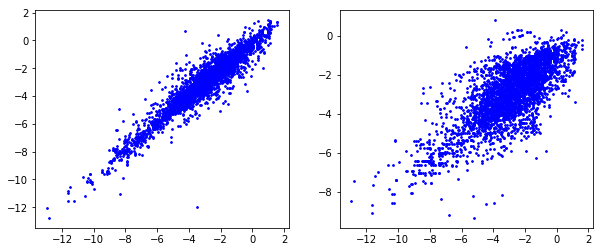

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LinearRegression

sol = pd.read_csv("13321_2018_308_MOESM1_ESM.csv")
print(sol.shape)
print(sol.columns)
t = sol["LogS"].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)

X = sol[sol.columns[7:len(sol.columns)]]
X2 = sol[sol.columns[7:16]]
X.drop(['NAME'],axis=1,inplace=True)
X2.drop(['NAME'],axis=1,inplace=True)
N, p = X.shape
N2,p2=X2.shape
print(X.shape)
print(t.shape)
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w

X2_train, X2_test, t2_train, t2_test = train_test_split(X2, t, test_size=0.3)
# Regularized regression
#
gamma = 2.3
w2 =np.linalg.inv(X2_train.T @ X2_train + gamma*np.identity(p2)) @ X2_train.T @ t2_train
th2_train = X2_train @ w2
th2_test = X2_test @ w2

th_X = X @ w
th_X2 = X2 @ w2
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='b', s=3)
ax[1].scatter(t_test, th_test, c='b', s=3)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t, th_X, c='b', s=3)
ax[1].scatter(t, th_X2, c='b', s=3)
# ... plots
#
# Over to you for implementing Lasso